In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread


In [18]:
#dowload the data and add the path
my_data_dir = 'C:\\Users\\Ultimatrix\\Downloads\\TF_2_Notebooks_and_Data\\04-CNNs\\cell_images'

In [19]:
os.listdir(my_data_dir) 

['test', 'train']

In [20]:
test_path = my_data_dir+'\\test\\'
train_path = my_data_dir+'\\train\\'

In [21]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [22]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [27]:
os.listdir(train_path+'\\parasitized')

['C100P61ThinF_IMG_20150918_144104_cell_162.png',
 'C100P61ThinF_IMG_20150918_144104_cell_163.png',
 'C100P61ThinF_IMG_20150918_144104_cell_164.png',
 'C100P61ThinF_IMG_20150918_144104_cell_165.png',
 'C100P61ThinF_IMG_20150918_144104_cell_166.png',
 'C100P61ThinF_IMG_20150918_144104_cell_167.png',
 'C100P61ThinF_IMG_20150918_144104_cell_168.png',
 'C100P61ThinF_IMG_20150918_144104_cell_169.png',
 'C100P61ThinF_IMG_20150918_144104_cell_170.png',
 'C100P61ThinF_IMG_20150918_144104_cell_171.png',
 'C100P61ThinF_IMG_20150918_144348_cell_138.png',
 'C100P61ThinF_IMG_20150918_144348_cell_139.png',
 'C100P61ThinF_IMG_20150918_144348_cell_140.png',
 'C100P61ThinF_IMG_20150918_144348_cell_141.png',
 'C100P61ThinF_IMG_20150918_144348_cell_142.png',
 'C100P61ThinF_IMG_20150918_144348_cell_143.png',
 'C100P61ThinF_IMG_20150918_144823_cell_157.png',
 'C100P61ThinF_IMG_20150918_144823_cell_158.png',
 'C100P61ThinF_IMG_20150918_144823_cell_159.png',
 'C100P61ThinF_IMG_20150918_144823_cell_160.png',


In [28]:
os.listdir(train_path+'\\parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [24]:
para_cell = train_path+'\\parasitized'+'\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [30]:
para_cell

'C:\\Users\\Ultimatrix\\Downloads\\TF_2_Notebooks_and_Data\\04-CNNs\\cell_images\\train\\\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [29]:
imread(para_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [25]:
para_img= imread(para_cell)

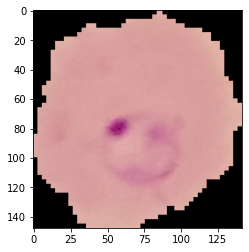

In [26]:
plt.imshow(para_img)

In [14]:
para_img.shape

(148, 142, 3)

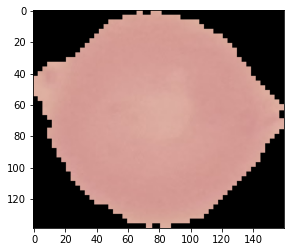

In [32]:
unifected_cell_path = train_path+'\\uninfected\\'+os.listdir(train_path+'\\uninfected')[0]
unifected_cell = imread(unifected_cell_path)
plt.imshow(unifected_cell)

In [33]:
#Let's check how many images there are.

In [34]:
len(os.listdir(train_path+'\\parasitized'))

12480

In [35]:
len(os.listdir(train_path+'\\uninfected'))

12480

In [36]:
#Let's find out the average dimensions of these images

In [37]:
unifected_cell.shape

(139, 160, 3)

In [38]:
para_img.shape

(148, 142, 3)

In [39]:
# Other options: https://stackoverflow.com/questions/1507084/how-to-check-dimensions-of-all-images-in-a-directory-using-python
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'\\uninfected'):
    
    img = imread(test_path+'\\uninfected'+'\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

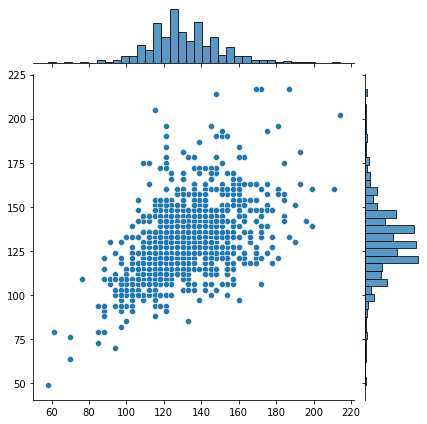

In [41]:
sns.jointplot(x=dim1,y=dim2)

In [42]:
np.mean(dim1)

130.92538461538462

In [43]:
np.mean(dim2)

130.75

In [44]:
#we are going to average the all img shape as below
image_shape = (130,130,3)

## Preparing the Data for the model

There is too much data for us to read all at once in memory. We can use some built in functions in Keras to automatically process the data, generate a flow of batches from a directory, and also manipulate the images.

### Image Manipulation

Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. We can use the **ImageDataGenerator** to do this automatically for us. Check out the documentation for a full list of all the parameters you can use here!

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [46]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

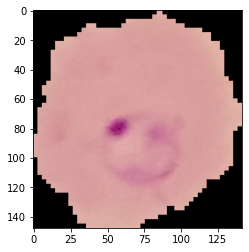

In [47]:
plt.imshow(para_img)

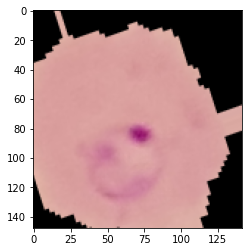

In [48]:
plt.imshow(image_gen.random_transform(para_img))

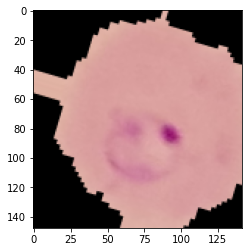

In [51]:
plt.imshow(image_gen.random_transform(para_img))

### Generating many manipulated images from a directory


In order to use .flow_from_directory, you must organize the images in sub-directories. This is an absolute requirement, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:

* Image Data Folder
    * Class 1
        * 0.jpg
        * 1.jpg
        * ...
    * Class 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Class n

In [53]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [54]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


# Creating the Model

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [56]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [58]:
## Early Stopping

In [59]:
from tensorflow.keras.callbacks import EarlyStopping

In [60]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

## Training the Model

In [62]:
batch_size = 16

In [63]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [64]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [65]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [66]:
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

<ipython-input-66-569c1e4d5038>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen,epochs=20,


Epoch 1/20
1560/1560 [==============================] - 316s 202ms/step - loss: 0.3439 - accuracy: 0.8540 - val_loss: 0.2097 - val_accuracy: 0.9323
Epoch 2/20
1560/1560 [==============================] - 376s 241ms/step - loss: 0.1782 - accuracy: 0.9446 - val_loss: 0.1746 - val_accuracy: 0.9419
Epoch 3/20
1560/1560 [==============================] - 380s 244ms/step - loss: 0.1669 - accuracy: 0.9487 - val_loss: 0.1641 - val_accuracy: 0.9419
Epoch 4/20
1560/1560 [==============================] - 362s 232ms/step - loss: 0.1642 - accuracy: 0.9494 - val_loss: 0.1541 - val_accuracy: 0.9485
Epoch 5/20
1560/1560 [==============================] - 359s 230ms/step - loss: 0.1573 - accuracy: 0.9496 - val_loss: 0.1520 - val_accuracy: 0.9496
Epoch 6/20
1560/1560 [==============================] - 345s 221ms/step - loss: 0.1574 - accuracy: 0.9507 - val_loss: 0.1490 - val_accuracy: 0.9538
Epoch 7/20
1560/1560 [==============================] - 305s 196ms/step - loss: 0.1528 - accuracy: 0.9516 - val_

In [67]:
from tensorflow.keras.models import load_model
model.save('rahul_models\malaria_detector.h5')

In [68]:
# Evaluating the Model

In [70]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

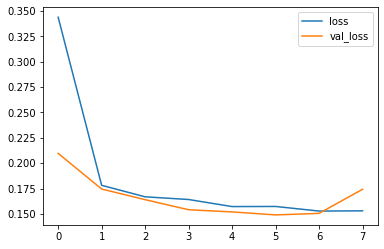

In [71]:
losses[['loss','val_loss']].plot()

In [72]:
model.metrics_names

['loss', 'accuracy']

In [73]:
model.evaluate_generator(test_image_gen)

<ipython-input-73-31acfd80dad9>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_image_gen)


[0.17831960320472717, 0.9415384531021118]

In [74]:
from tensorflow.keras.preprocessing import image

In [75]:
# https://datascience.stackexchange.com/questions/13894/how-to-get-predictions-with-predict-generator-on-streaming-test-data-in-keras
pred_probabilities = model.predict_generator(test_image_gen)

<ipython-input-75-f14b427af105>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred_probabilities = model.predict_generator(test_image_gen)


In [76]:
pred_probabilities

array([[4.5105815e-04],
       [3.3423305e-03],
       [2.1117926e-04],
       ...,
       [9.8224312e-01],
       [9.9092191e-01],
       [9.8846197e-01]], dtype=float32)

In [77]:
predictions = pred_probabilities > 0.5

In [78]:
# Numpy can treat this as True/False for us
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [79]:
from sklearn.metrics import classification_report,confusion_matrix

In [80]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      1300
           1       0.92      0.97      0.95      1300

    accuracy                           0.94      2600
   macro avg       0.95      0.94      0.94      2600
weighted avg       0.95      0.94      0.94      2600



In [81]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1190,  110],
       [  36, 1264]], dtype=int64)

In [82]:
# Your file path will be different!
para_cell

'C:\\Users\\Ultimatrix\\Downloads\\TF_2_Notebooks_and_Data\\04-CNNs\\cell_images\\train\\\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [83]:
my_image = image.load_img(para_cell,target_size=image_shape)

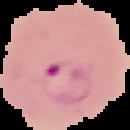

In [84]:
my_image

In [85]:
type(my_image)

PIL.Image.Image

In [86]:
my_image = image.img_to_array(my_image)

In [87]:
type(my_image)

numpy.ndarray

In [88]:
my_image.shape

(130, 130, 3)

In [89]:
my_image = np.expand_dims(my_image, axis=0)

In [90]:
my_image.shape

(1, 130, 130, 3)

In [91]:
model.predict(my_image)

array([[0.]], dtype=float32)

In [92]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}